In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiersMOMENTUM import trainSingleLayer, runSingleLayer

plt.rcParams['figure.facecolor']='white'

In [318]:
# This script will help you test your single layer neural network code
# Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 4; # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

In [319]:
# Select a subset of the training samples
numBins = 2                        # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True              # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Randomly select which Bins to use for training and testing
whichBinTrain = np.random.binomial(1, 0.5) # Training Bin will be the draw from a binomial distribution with p = 0.5
whichBinTest = abs(whichBinTrain-1) # Testing data is the other Bin

# Add your own code to setup data for training and test here
XTrain = XBins[whichBinTrain]
DTrain = DBins[whichBinTrain]
LTrain = LBins[whichBinTrain]
XTest  = XBins[whichBinTest]
DTest  = DBins[whichBinTest]
LTest  = LBins[whichBinTest]

In [320]:
# Modify the X Matrices so that a bias is added
# Note that the bias must be the last feature for the plot code to work

# The training data with bias column added
XTrain = np.hstack((XTrain,np.ones([XTrain.shape[0],1], XTrain.dtype)))
# The test data with bias column added
XTest = np.hstack((XTest,np.ones([XTest.shape[0],1], XTest.dtype)))

In [321]:
XTrain.shape

(2770, 65)

In [337]:
# Train your single layer network
# Note: You need to modify trainSingleLayer() and runSingleLayer() in order to train the network

Nclasses = len(np.unique(LTrain))
numIterations = 300;  # Change this, number of iterations (epochs)
learningRate  = 0.01; # Change this, your learning rate

if dataSetNr < 4:
    if dataSetNr == 1:
        numIterations = 20
        np.random.seed(200)
        W0 = np.array(np.random.rand(XTrain.shape[1] * Nclasses)).reshape((XTrain.shape[1],Nclasses))
        learningRate  = 0.01; 
    if dataSetNr == 2:
        numIterations = 50
        np.random.seed(300)
        W0 = np.array(np.random.rand(XTrain.shape[1] * Nclasses)).reshape((XTrain.shape[1],Nclasses))
        learningRate  = 0.01; 
    if dataSetNr == 3:
        numIterations = 200
        np.random.seed(0)
        W0 = np.array(np.random.rand(XTrain.shape[1] * Nclasses)).reshape((XTrain.shape[1],Nclasses))
        learningRate  = 0.01; 
    
else:
    np.random.seed(0)
    learningRate = 0.0001
    W0 = np.random.rand(len(np.unique(LTrain))*65).reshape((XTrain.shape[1],len(np.unique(LTrain))))

# Run training loop
W, ErrTrain, ErrTest = trainSingleLayer(XTrain, DTrain, XTest, DTest, W0, numIterations, learningRate, momentum=0.95)

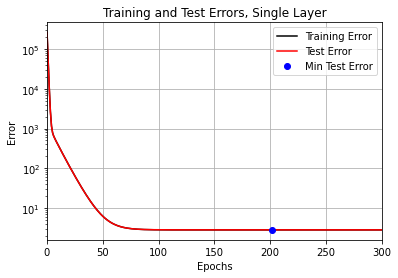

In [338]:
# Plot errors
# Note: You should not have to modify this code

minErrTest = ErrTest.min()
minErrTestInd = ErrTest.argmin()

plt.figure()

plt.semilogy(ErrTrain, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd, minErrTest, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, Single Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [339]:
# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

YPredTrain, LPredTrain = runSingleLayer(XTrain, W)
YPredTest, LPredTest  = runSingleLayer(XTest , W)

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[274.   0.   5.   1.   1.   1.   1.   0.   4.   8.]
 [  0. 236.   5.   1.   2.   1.   1.   2.  34.   5.]
 [  0.  16. 256.   3.   0.   3.   0.   0.   5.   1.]
 [  0.   0.   0. 256.   0.   0.   0.   1.   4.   3.]
 [  2.   0.   0.   0. 258.   2.   1.   0.   3.   9.]
 [  0.   1.   0.   2.   0. 246.   0.   0.   1.   1.]
 [  1.   7.   1.   1.   4.   4. 274.   0.  15.   0.]
 [  0.   2.   8.   5.  12.   3.   0. 273.  14.  20.]
 [  0.   1.   1.   2.   0.   0.   0.   1. 184.   1.]
 [  0.  14.   1.   6.   0.  17.   0.   0.  13. 229.]]
Accuracy: 0.8975


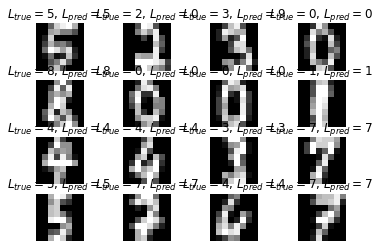

In [340]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'single', W, [])
else:
    plotResultsOCR(XTest, LTest, LPredTest)